In [147]:
import glob
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydub import AudioSegment
# run the following command to proper use pydub
# sudo apt-get install ffmpeg libavcodec-extra

sns.set_style('whitegrid')

In [124]:
file_names = sorted(glob.glob('../data/raw/*.mp3'))
file_names

['../data/raw/F_01.mp3',
 '../data/raw/F_02.mp3',
 '../data/raw/F_03.mp3',
 '../data/raw/F_04.mp3',
 '../data/raw/F_05.mp3',
 '../data/raw/F_06.mp3',
 '../data/raw/F_07.mp3',
 '../data/raw/F_08.mp3',
 '../data/raw/F_09.mp3']

In [125]:
segments = [AudioSegment.from_mp3(f) for f in file_names]
print(segments[0].frame_rate)
segments[0]

44100


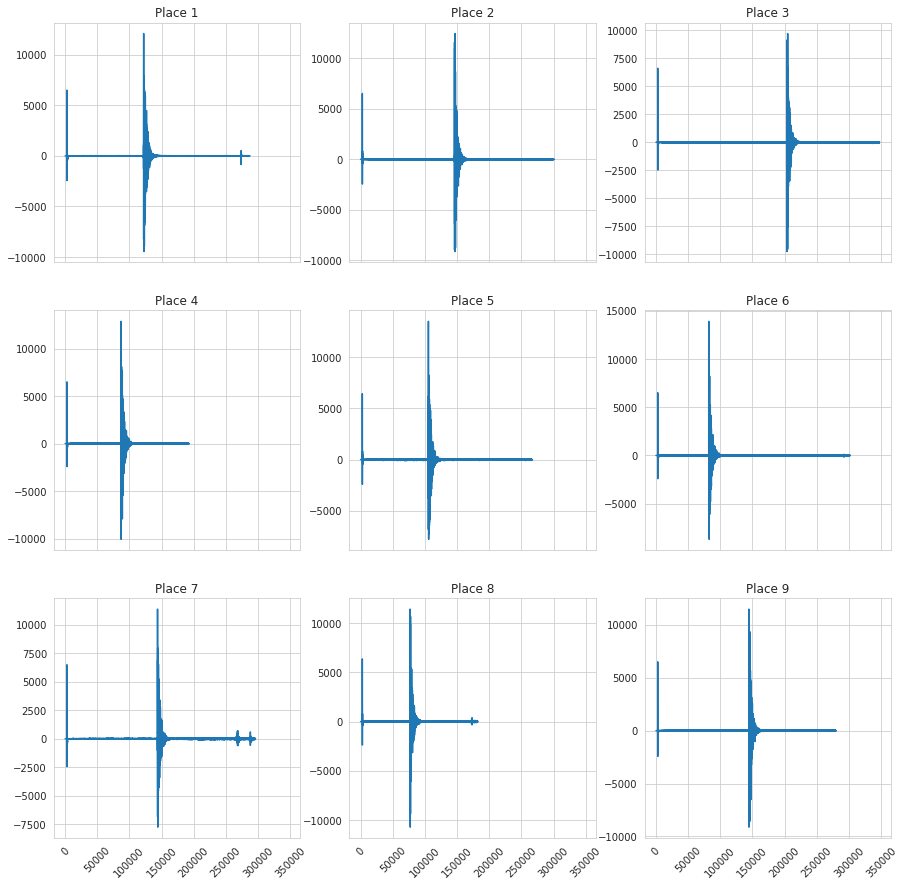

In [126]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15), sharex=True)
for n, seg in enumerate(segments):
    x, y = int(n / 3), int(n % 3)
    
    signal = np.array(seg.get_array_of_samples())
    
    ax[x, y].plot(signal)
    ax[x, y].set_title('Place {}'.format(n + 1))
    ax[x, y].tick_params(axis='x', rotation=45)


In [237]:
cuts = [
    (120000, 150000),
    (140000, 170000),
    (200000, 230000),
    (80000, 110000),
    (100000, 130000),
    (80000, 110000),
    (140000, 170000),
    (70000,   100000),
    (140000, 170000),
]

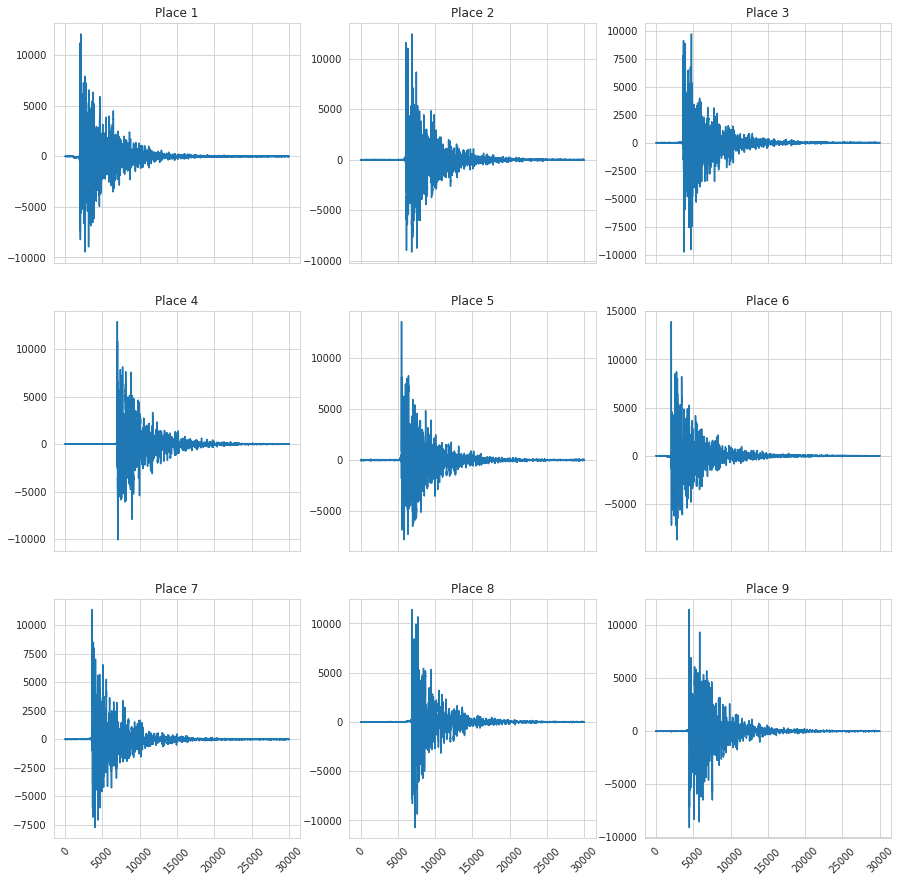

In [238]:
cutted_signals = []

fig, ax = plt.subplots(3, 3, figsize=(15, 15), sharex=True)
for n, (seg, cut) in enumerate(zip(segments, cuts)):
    x, y = int(n / 3), int(n % 3)
    
    signal = np.array(seg.get_array_of_samples())
    signal = signal[cut[0]:cut[1]]

    cutted_signals.append(signal)
    
    ax[x, y].plot(signal)
    ax[x, y].set_title('Place {}'.format(n + 1))
    ax[x, y].tick_params(axis='x', rotation=45)


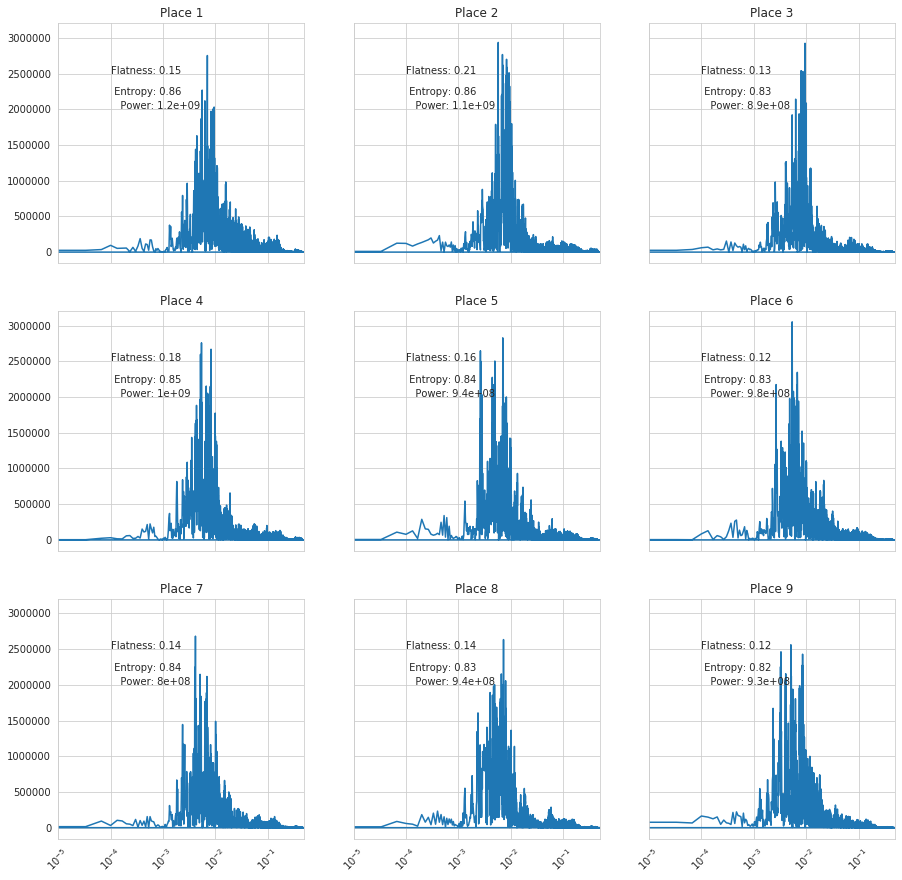

In [239]:
flats = []
ents = []
po = []
fig, ax = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True)
for n, signal in enumerate(cutted_signals):
    x, y = int(n / 3), int(n % 3)

    ps = np.fft.fft(signal)
    freq = np.fft.fftfreq(signal.shape[-1])
    power = np.abs(ps.real)
    flatness = sp.stats.mstats.gmean(power)/ np.mean(power)
    
    pdf = power / np.sum(power)
    entropy = -np.sum([p*np.log(p) for p in pdf]) / np.log(len(power))
    
    total_power = np.sum(power)
    
    flats.append(flatness)
    ents.append(entropy)
    po.append(total_power)
    
    ax[x, y].text(0.0001, 2500000,'Flatness: {:.2}'.format(flatness), zorder=10)
    ax[x, y].text(0.0001, 2200000,' Entropy: {:.2}'.format(entropy), zorder=10)
    ax[x, y].text(0.0001, 2000000,'   Power: {:.2}'.format(total_power), zorder=10)
    ax[x, y].plot(freq, power)
    ax[x, y].set_title('Place {}'.format(n + 1))
    ax[x, y].tick_params(axis='x', rotation=45)
    
plt.xscale('log')
# plt.yscale('log')
plt.xlim([0.00001, max(freq)]);

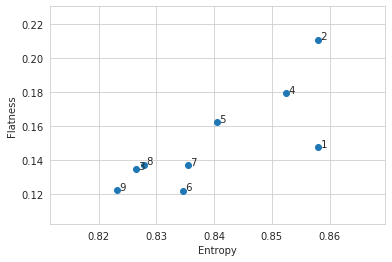

In [240]:
fig,  ax = plt.subplots()
ax.scatter(ents, flats)
ax.set_xlabel('Entropy')
ax.set_ylabel('Flatness')
for n, (e, f) in enumerate(zip(ents, flats)):
    ax.text(e, f, ' {}'.format(n+1));

In [241]:
flats = np.array(flats)
flats.resize((3, 3))

ents = np.array(ents)
ents.resize((3, 3))

po = np.array(po)
po.resize((3, 3))

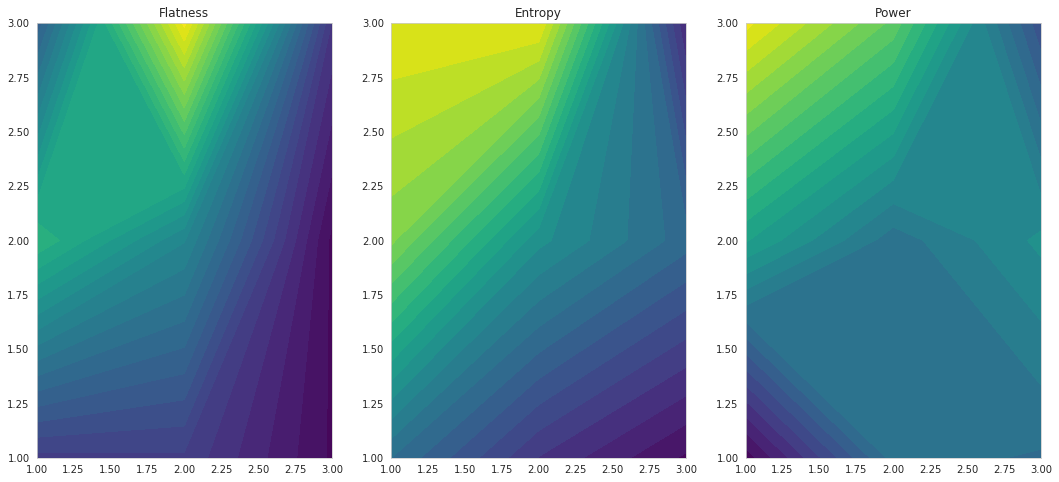

In [242]:
X, Y = np.meshgrid(range(1, 4),range(1, 4))
Z_f = np.flip(flats, axis=0)
Z_e = np.flip(ents, axis=0)
Z_p = np.flip(po, axis=0)

_, ax = plt.subplots(1, 3,figsize=(18, 8))
ax[0].contourf(X, Y, Z_f, cmap='viridis', levels=30);
ax[1].contourf(X, Y, Z_e, cmap='viridis', levels=30);
ax[2].contourf(X, Y, Z_p, cmap='viridis', levels=30);

ax[0].set_title('Flatness')
ax[1].set_title('Entropy');
ax[2].set_title('Power');